# Imported Libraries

In [2]:
import math                         
import numpy as np                  
import pandas as pd               
import seaborn as sns              
import matplotlib.pyplot as plt   
%matplotlib inline                 
sns.set_theme(style = "darkgrid")
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import statsmodels.api as sm
import quandl
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (15, 10)
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import DistanceMetric
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score,cross_val_predict




# Question 2

# 2.3

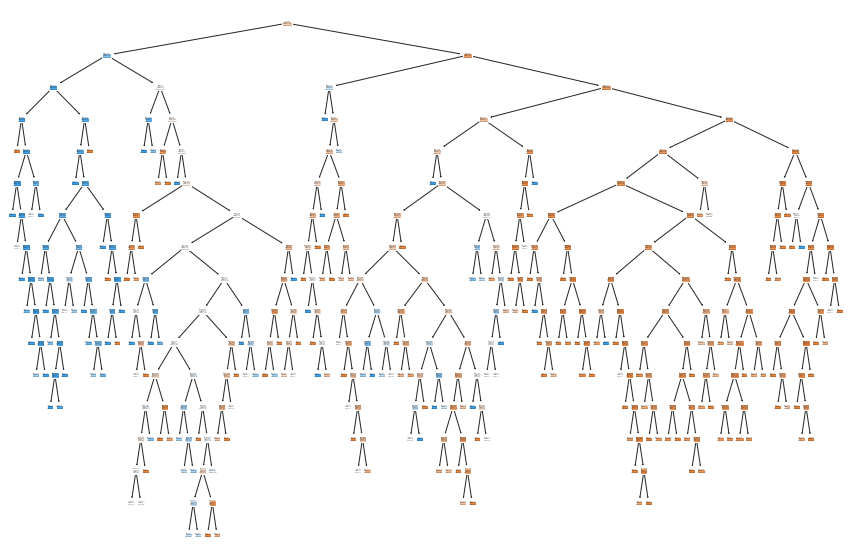

In [3]:
##################################################Load Titanic Data into a DataFrame#####################################
titanicDataframe = pd.read_csv("titanic3.csv")

titanicDataframePredictor = titanicDataframe[['pclass', 'age', 'sex']]

#Get the mean of the  age column and fill  with the null
titanicDataframePredictor['age'] = titanicDataframePredictor['age'].fillna(titanicDataframePredictor['age'].mean())

titanicDataframePredictor['sex'] = titanicDataframePredictor["sex"].replace(["female", "male"], [0,1])


##################### Create and Fit the model###################

Model = DecisionTreeClassifier(random_state=0)

Model.fit(titanicDataframePredictor, titanicDataframe["survived"])

tree.plot_tree(Model, feature_names=titanicDataframePredictor.columns, filled=True)
plt.show()

# 2.4 

In [4]:
#Evaluation of performance before pruning

evaluationValues = cross_val_score(Model, titanicDataframePredictor, titanicDataframe['survived'], cv=4, scoring='balanced_accuracy')

getMeanEvaluation = np.mean(evaluationValues)
print(f"The values of the accuracy before pruning = {getMeanEvaluation}")

########################### Values of the accuracy after prune ####################

evaluationValuesAfterPruning = DecisionTreeClassifier(ccp_alpha=0.10)

evaluationValuesAfterPruning = evaluationValuesAfterPruning.fit(titanicDataframePredictor, titanicDataframe['survived'])

crossValidationValues = cross_val_score(evaluationValuesAfterPruning, titanicDataframePredictor, titanicDataframe['survived'], cv=5,  scoring='balanced_accuracy')

valueOfAccuracyAfterPruning = np.mean(crossValidationValues)

print(f"After pruning Accuracy = {valueOfAccuracyAfterPruning}")


The values of the accuracy before pruning = 0.6793620201921671
After pruning Accuracy = 0.7604899164174526


# 2.5


In [5]:
################################## comparing logistic model accuracy with the decision tree###############################
lRegressionModel = LogisticRegression()
predictedValues  = cross_val_predict(lRegressionModel, titanicDataframePredictor, np.ravel(titanicDataframe['survived']), cv=5)

accuracyLogistic = accuracy_score(titanicDataframe['survived'], predictedValues)

print(f"Logistic model Accuracy: ", accuracyLogistic)


Logistic model Accuracy:  0.7028265851795263


# Question 3 

# 3.3

In [6]:
##################################################Load Titanic Data into a DataFrame#####################################
titanicDataframe = pd.read_csv("titanic3.csv")

titanicDataframePredictor = titanicDataframe[['pclass', 'age', 'sex']]

#Get the mean of the  age column and fill  with the null
titanicDataframePredictor['age'] = titanicDataframePredictor['age'].fillna(titanicDataframePredictor['age'].mean())

titanicDataframePredictor['sex'] = titanicDataframePredictor["sex"].replace(["female", "male"], [0,1])

titanicDataframe["survived"]

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

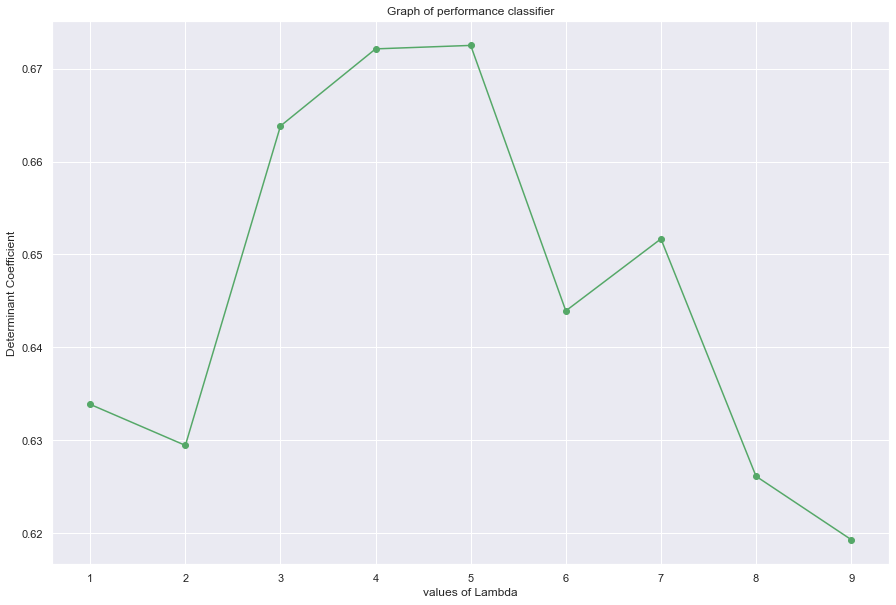

In [7]:
##################################performance of the classifier versus the number of neighbors used#############
neighbourList = list(range(1, 10))

values = []

#iterate over the neighbour List
for k in neighbourList:
    classifierValue = KNeighborsClassifier(n_neighbors = k)
    classifierValue.fit(titanicDataframePredictor, titanicDataframe["survived"])
    PredictionValue = classifierValue.predict(titanicDataframePredictor)
    crossValidationValues = cross_validate(classifierValue, titanicDataframePredictor, titanicDataframe["survived"], cv=5, scoring='balanced_accuracy')
    getMeanScore = np.mean(crossValidationValues['test_score'])
    values.append(getMeanScore)
    
plt.plot(neighbourList, values, "go-")
plt.ylabel("Determinant Coefficient")
plt.xlabel("values of Lambda")
plt.title("Graph of performance classifier")
plt.show()

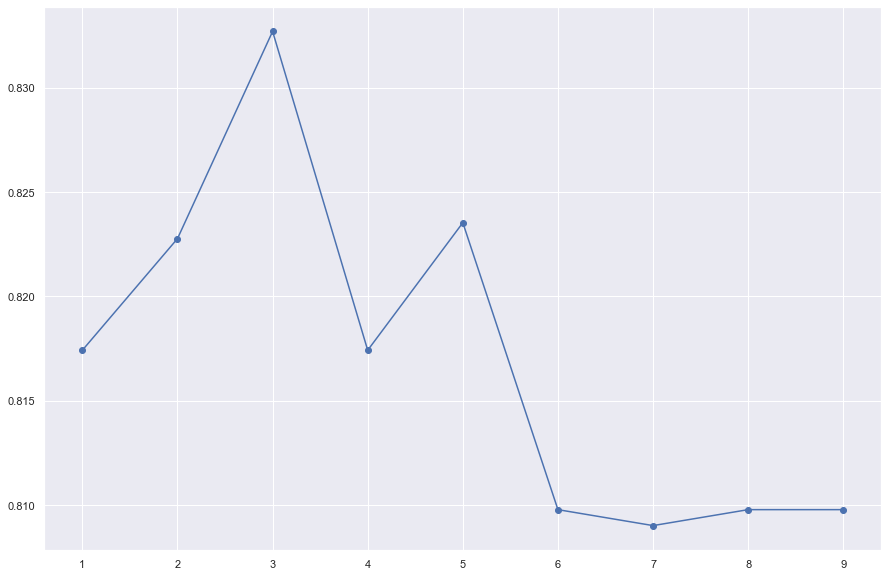

In [8]:
neighbourList = list(range(1,10))
sample_values = []
for k in neighbourList:
    classifierValue = KNeighborsClassifier(n_neighbors = k)
    classifierValue.fit(titanicDataframePredictor, titanicDataframe["survived"])
    PredictionValue = classifierValue.predict(titanicDataframePredictor)
    sample_values_accuracy = accuracy_score(titanicDataframe["survived"], PredictionValue)
    sample_values.append(sample_values_accuracy)

plt.plot(neighbourList, sample_values, "bo-")
plt.show()

# 3.4 

In [9]:
##############################the 4 major Types of Distance Metrics in Machine Learning are:###################################
#Euclidean Distance
#Manhattan Distance
#Minkowski Distance
#Hamming Distance
#Evaluate the performance using different distance metrics. 
#Create a list to store the distance metrics stated above

distanceMetricList = ["manhattan", "hamming", "minkowski", "euclidean", "chebyshev", "canberra", "braycurtis"]

#Iterate over the distance metrics
for k in distanceMetricList:
    
    classifierValue = KNeighborsClassifier(n_neighbors= 5, metric=k)
    
    classifierValue.fit(titanicDataframePredictor, titanicDataframe["survived"])
    
    PredictionValue = classifierValue.predict(titanicDataframePredictor)
    
    getDistanceValue = cross_validate(classifierValue, titanicDataframePredictor, titanicDataframe["survived"], cv=5, scoring='balanced_accuracy')
    
    getDistanceValueMean = np.mean(getDistanceValue['test_score'])
    
    print(f"The distance metrics value for {k} = {getDistanceValueMean}")


The distance metrics value for manhattan = 0.6828122076527874
The distance metrics value for hamming = 0.628295376121463
The distance metrics value for minkowski = 0.6724912199984663
The distance metrics value for euclidean = 0.6724912199984663
The distance metrics value for chebyshev = 0.6104958975538686
The distance metrics value for canberra = 0.6737087646652864
The distance metrics value for braycurtis = 0.6419880377271681



# 3.5

In [10]:
###########################Compare the best KNN classifier with logistic regression#############################

#K-Nearest Neigbhbour

classifierValue = KNeighborsClassifier(n_neighbors= 5, metric="euclidean")

classifierValue.fit(titanicDataframePredictor, titanicDataframe["survived"])

PredictionValue = classifierValue.predict(titanicDataframePredictor)

distanceAccuracy = cross_validate(classifierValue, titanicDataframePredictor, titanicDataframe["survived"], cv=5, scoring='balanced_accuracy')

getDistanceAccuracyMean = np.mean(distanceAccuracy['test_score'])

print(f"The accuracy for KNN classifier is {getDistanceAccuracyMean}")

##########################Logistic Regression#############################################
lRegression = linear_model.LogisticRegression()

lRegression.fit(titanicDataframePredictor, titanicDataframe["survived"])

predictY = lRegression.predict(titanicDataframePredictor)

logisticAccuracy = cross_validate(lRegression, titanicDataframePredictor, titanicDataframe["survived"], cv=5, scoring='balanced_accuracy')

getlogisticAccuracyMean = np.mean(logisticAccuracy['test_score'])

print(f"The accuracy for Logistic regression = {getlogisticAccuracyMean}")


The accuracy for KNN classifier is 0.6724912199984663
The accuracy for Logistic regression = 0.6940033739743884


# Question 4

# 4.1

*********************** Average of White Wine***************

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64
*********************** Average of Red Wine***************

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64


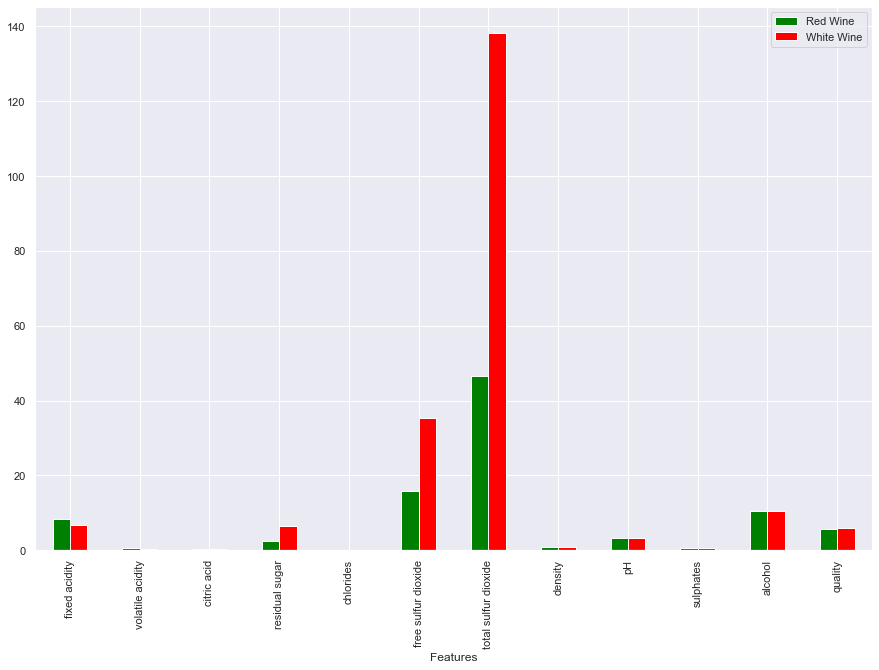

In [11]:
#########################################Load the white and red wine data into a dataframe##################################################
whiteWineDataFrame = pd.read_csv("winequality-white.csv")

redWineDataFrame = pd.read_csv("winequality-red.csv")

whiteWineDataFrame[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH','sulphates', 'alcohol','quality']] = whiteWineDataFrame['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';', expand=True)

redWineDataFrame[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH','sulphates', 'alcohol','quality']] = redWineDataFrame['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';', expand=True)

removeDefaultColumns = ['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"']

whiteWineDataFrame.drop(removeDefaultColumns, axis = 1, inplace=True)

redWineDataFrame.drop(removeDefaultColumns, axis = 1, inplace=True)


#Convert the dataframe to float
whiteWineDataFrame = whiteWineDataFrame.astype(float)

redWineDataFrame = redWineDataFrame.astype(float)

#Get the mean of the dataframe
whiteWineDataFrameMean = np.mean(whiteWineDataFrame)

redWineDataFrameMean = np.mean(redWineDataFrame)

print("*********************** Average of White Wine***************\n")
print(whiteWineDataFrameMean)

print("*********************** Average of Red Wine***************\n")

print(redWineDataFrameMean)

#Combine the data needed data from the two datasets
columnHolder = redWineDataFrame.columns

holdMeanOfRedWineData = np.array(redWineDataFrame.mean())

holdMeanOfWhiteWineData = np.array(whiteWineDataFrame.mean())

newDataFrame = pd.DataFrame(list(zip(columnHolder, holdMeanOfRedWineData, holdMeanOfWhiteWineData)), columns =['Features', 'Red Wine', "White Wine"])

################################comparison using a bar graph##################################
newDataFrame.plot(x="Features", kind = "bar", width=0.5, color=['green', 'red'])
plt.xticks(rotation=90)
plt.show()

# 4.2

In [12]:
##############################################Correlation between each feature and dependent variable for white wine####################################################

whiteWineDataFrameCorr = whiteWineDataFrame.loc[:, whiteWineDataFrame.columns != 'quality']

whiteCorr = whiteWineDataFrameCorr.corrwith(whiteWineDataFrame["quality"])

print(f"{whiteCorr}")

##############################################Correlation between each feature and dependent variable for Red wine####################################################

redWineDataFrameCorr = redWineDataFrame.loc[:, redWineDataFrame.columns != 'quality']

RedCorr = redWineDataFrameCorr.corrwith(redWineDataFrame["quality"])

print("*********************Red Wine Correlation ***************************")

print(f"{RedCorr}")


fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
dtype: float64
*********************Red Wine Correlation ***************************
fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
dtype: float64


The most essential element for identifying quality of both red and white wine varieties, as seen in the correlation table, is alcohol, which has a positive correlation of 0.476166 for red wine and 0.435575 for white wine.

# 4.3

In [13]:
###################Use Lasso and cross-validation to provide a plot of MSE against lambda and the parameterestimates versus lambda.#########
lassoModel = linear_model.Lasso(alpha=0.1, normalize=False)

lassoModel.fit(redWineDataFrameCorr, redWineDataFrame["quality"])

values = lassoModel.score(redWineDataFrameCorr, redWineDataFrame["quality"])

print(f"{values}")

0.23937236014517016


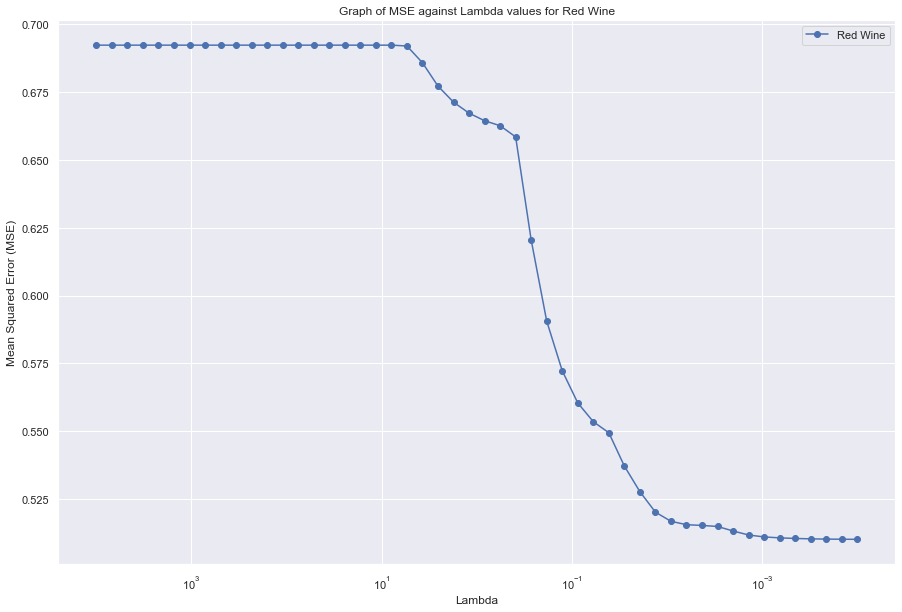

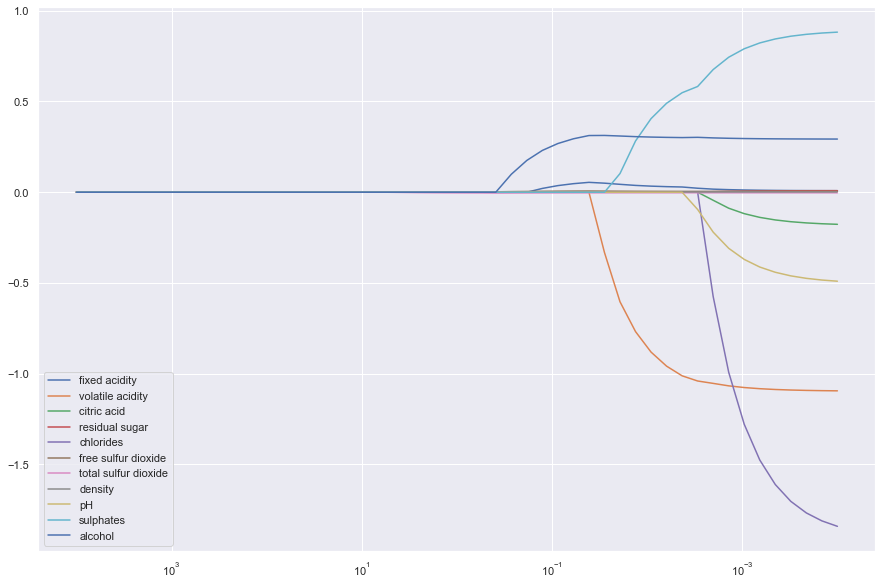

In [14]:
###################Use Lasso and cross-validation to provide a plot of MSE against lambda and the parameterestimates versus lambda.#########
#logspacecreates an array by using the numbers that are evenly separated on a log scale
lambdaRangeRedWine = np.logspace(-4, 4)

list_mean_squared_error_red_wine = []

list_coefficient_red_wine = []

for k in lambdaRangeRedWine:
    
    lassoModel = linear_model.Lasso(alpha= k, random_state=0)
    
    fitValue = lassoModel.fit(redWineDataFrameCorr, redWineDataFrame["quality"])
    
    predictRedWine  = lassoModel.predict(redWineDataFrameCorr)
    
    crossValidationValues = cross_validate(fitValue, redWineDataFrameCorr, redWineDataFrame["quality"], cv=5, scoring = 'neg_mean_absolute_error')
    
    crossValidationValues = np.mean(crossValidationValues['test_score'])
    
    list_mean_squared_error_red_wine.append(abs(crossValidationValues))
    
    coefRedWine = fitValue.coef_       
    
    list_coefficient_red_wine.append(coefRedWine)   

###########################Plotting the MSE graph#######################
plt.plot(lambdaRangeRedWine, list_mean_squared_error_red_wine, "bo-", label="Red Wine")

plt.xscale("log")         

plt.gca().invert_xaxis() 

plt.ylabel("Mean Squared Error (MSE)")

plt.xlabel("Lambda")

plt.title("Graph of MSE against Lambda values for Red Wine")

plt.legend()

plt.show()
################################################ Red Whine#####################################

redWineCoefData = pd.DataFrame(list_coefficient_red_wine, columns = redWineDataFrameCorr.columns, index = lambdaRangeRedWine)

#############################Plotting#############################
redWineCoefData.plot()
plt.xscale("log")
plt.gca().invert_xaxis()
plt.legend(loc='lower left')
plt.show()




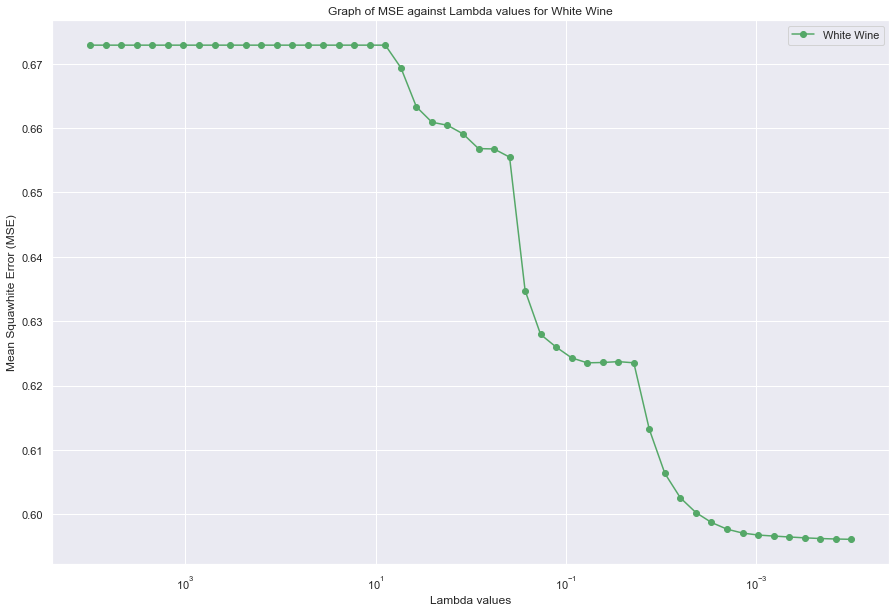

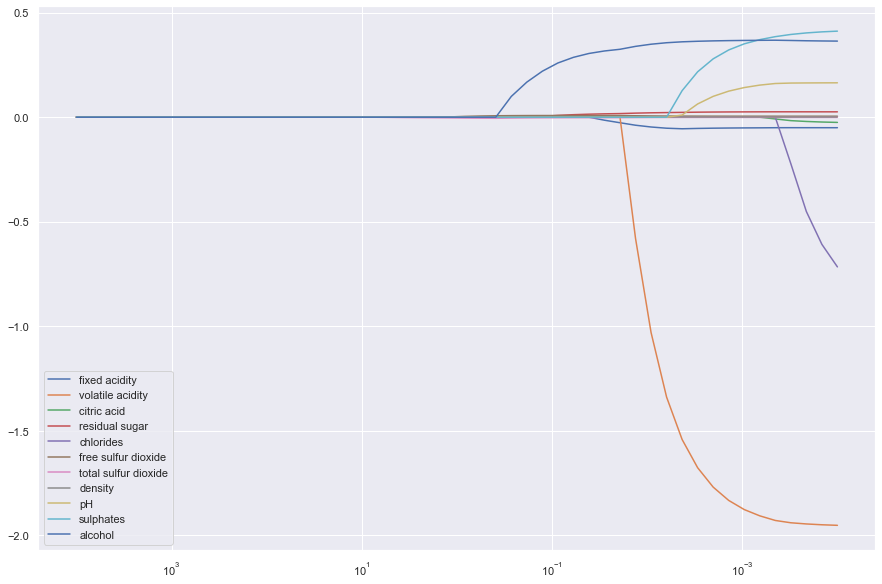

In [15]:
lambdaRangeWhiteWine = np.logspace(-4, 4)

list_mean_squared_error_white_wine = []

list_coefficient_white_wine = []

for i in lambdaRangeWhiteWine:
    modelWhiteWine = linear_model.Lasso(alpha = i, random_state = 0)
    whiteWine = modelWhiteWine.fit(whiteWineDataFrameCorr, whiteWineDataFrame["quality"])
    whiteWinePrediction = modelWhiteWine.predict(whiteWineDataFrameCorr)
    
    crossValidationValues = cross_validate(whiteWine, whiteWineDataFrameCorr, whiteWineDataFrame["quality"], cv=5, scoring = 'neg_mean_absolute_error')
    
    crossValidationValues = np.mean(crossValidationValues['test_score'])
    
    list_mean_squared_error_white_wine.append(abs(crossValidationValues))
    
    coefWhiteWine = whiteWine.coef_  
    list_coefficient_white_wine.append(coefWhiteWine) 

############################### Plot the graph################################################# 
plt.plot(lambdaRangeWhiteWine, list_mean_squared_error_white_wine, "go-", label="White Wine")
plt.xscale("log")         #applying log scaling to the x-axis 
plt.gca().invert_xaxis()  #invert the axis from highest to lowest
plt.ylabel("Mean Squawhite Error (MSE)")
plt.xlabel("Lambda values")
plt.title("Graph of MSE against Lambda values for White Wine")
plt.legend()
#plt.grid()
plt.show()


############################################second plot###################

#converting the list of lists of coefs for each lambda value and feature to a dataframe
whiteWineCoefData = pd.DataFrame(list_coefficient_white_wine, columns = whiteWineDataFrameCorr.columns, index = lambdaRangeWhiteWine)

whiteWineCoefData.plot()
plt.xscale("log")
plt.gca().invert_xaxis()
plt.legend(loc='lower left')
plt.show()

# 4.4

In [16]:
#######Use the features identified by LASSO to construct a KNN regression model for red wine.####
pos = list_mean_squared_error_red_wine.index(min(list_mean_squared_error_red_wine))

lambda_values = lambdaRangeRedWine[pos]

lambda_values

0.0001

In [17]:
lassoModel = linear_model.Lasso(alpha = lambda_values, random_state = 0)

redWhineFit = lassoModel.fit(redWineDataFrameCorr, redWineDataFrame["quality"])

coefRedWine = redWhineFit.coef_

selectedFeatures = redWineDataFrameCorr.columns[coefRedWine !=0]

selectedDataValues = redWineDataFrameCorr[selectedFeatures]

##########################KNN Regressor###########################
storeRegressor = KNeighborsRegressor()

storeRegressor.fit(selectedDataValues, redWineDataFrame["quality"])

storePrediction = storeRegressor.predict(selectedDataValues)

print("Predicted value:",storePrediction)

selectedDataValues


Predicted value: [5.4 5.6 4.8 ... 6.  5.2 5.8]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2


# 4.5

In [18]:
#mean square error with cross_validate
firstCrossValidation = cross_validate(storeRegressor, selectedDataValues, redWineDataFrame["quality"], cv=5, scoring = 'neg_mean_absolute_error')

firstCrossValidation = np.mean(abs(firstCrossValidation['test_score']))

print("The mean square error(KNN):",firstCrossValidation)

The mean square error(KNN): 0.6296532131661442


In [19]:
#r2 with cross validate
secondCrossValidation = cross_validate(storeRegressor, selectedDataValues, redWineDataFrame["quality"], cv=5, scoring = 'r2')

secondCrossValidation = np.mean(abs(secondCrossValidation['test_score']))

print("The R2 (KNN):",secondCrossValidation)

The R2 (KNN): 0.06784336955975942


In [20]:
#Linear regression
regModel = linear_model.LinearRegression()

regModel.fit(redWineDataFrameCorr, redWineDataFrame["quality"])
# res = regModel.score(redWineDataFrameCorr, redWineDataFrame["quality"])

res = cross_validate(regModel, redWineDataFrameCorr, redWineDataFrame["quality"], cv=5, scoring = 'r2')

finalRes = np.mean(abs(res['test_score']))

print(f"The coefficient of determination for linear regression R2: {finalRes}")

The coefficient of determination for linear regression R2: 0.2900416288421963


In [21]:
IndependentPred = regModel.fit(redWineDataFrameCorr, redWineDataFrame["quality"])

# mean_squared_error_value = mean_squared_error(redWineDataFrame["quality"], IndependentPred)

mean_squared_error_value = cross_validate(IndependentPred, redWineDataFrameCorr, redWineDataFrame["quality"], cv=5, scoring = 'neg_mean_absolute_error')

finalRes = np.mean(abs(mean_squared_error_value['test_score']))
print("Mean Squared Error for linear regression:", finalRes)

Mean Squared Error for linear regression: 0.5104055782302341
